In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
single_image= X_train[0]

In [6]:
single_image.shape

(28, 28)

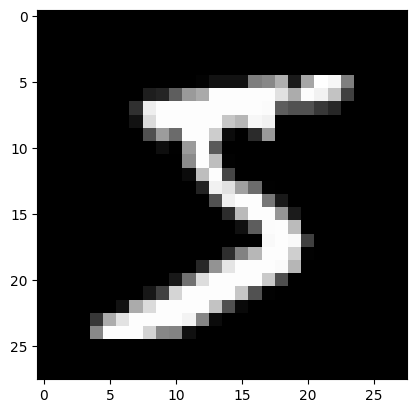

In [7]:
plt.imshow(single_image,cmap='gray')

In [8]:
y_train.shape

(60000,)

In [9]:
X_train.min()

0

In [10]:
X_train.max()

255

In [11]:

X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [12]:
X_train_scaled.min()

0.0

In [13]:
X_train_scaled.max()

1.0

In [14]:
y_train[0]

5

In [15]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [16]:
type(y_train_onehot)

numpy.ndarray

In [17]:
y_train_onehot.shape

(60000, 10)

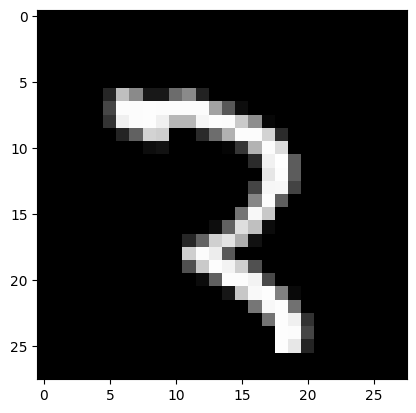

In [18]:
single_image = X_train[500]
plt.imshow(single_image,cmap='gray')

In [19]:
y_train_onehot[500]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [20]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [21]:
model = keras.Sequential()
model.add(layers.Input(shape=(28,28,1)))
model.add(layers.Conv2D(filters=32, kernel_size=(3,3),  activation='relu')),
model.add(layers.MaxPool2D(pool_size=(2, 2))),
model.add(layers.Flatten()),
model.add(layers.Dense(64, activation='relu')),
model.add(layers.Dense(10, activation='softmax'))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 64)                346176    
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 347146 (1.32 MB)
Trainable params: 347146 (1.32 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [23]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics='accuracy')

In [24]:
model.fit(X_train_scaled ,y_train_onehot, epochs=5,
          batch_size=64,
          validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/5
938/938 [==============================] - 15s 16ms/step - loss: 0.1907 - accuracy: 0.9449 - val_loss: 0.0785 - val_accuracy: 0.9756
Epoch 2/5
938/938 [==============================] - 14s 15ms/step - loss: 0.0637 - accuracy: 0.9810 - val_loss: 0.0635 - val_accuracy: 0.9792
Epoch 3/5
938/938 [==============================] - 14s 15ms/step - loss: 0.0430 - accuracy: 0.9873 - val_loss: 0.0443 - val_accuracy: 0.9840
Epoch 4/5
938/938 [==============================] - 14s 15ms/step - loss: 0.0318 - accuracy: 0.9900 - val_loss: 0.0477 - val_accuracy: 0.9854
Epoch 5/5
938/938 [==============================] - 14s 15ms/step - loss: 0.0241 - accuracy: 0.9925 - val_loss: 0.0434 - val_accuracy: 0.9858


In [25]:
metrics = pd.DataFrame(model.history.history)

In [26]:
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.190661,0.944883,0.078516,0.9756
1,0.063663,0.981033,0.063532,0.9792
2,0.043028,0.987283,0.044264,0.9840
3,0.031826,0.989950,0.047680,0.9854
4,0.024076,0.992533,0.043416,0.9858


Developed by :SHRIRAM S 
Reg No:212222240098


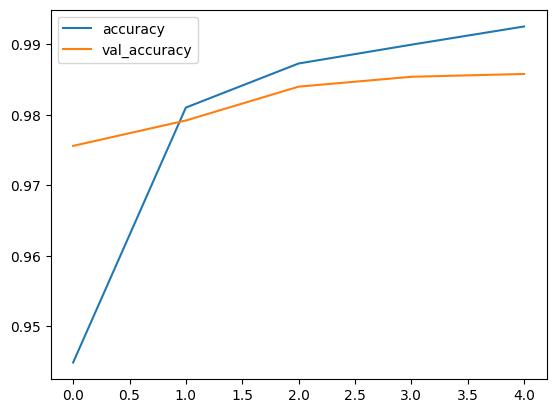

In [45]:
metrics[['accuracy','val_accuracy']].plot()
print("Developed by :SHRIRAM S ")
print("Reg No:212222240098")

Developed by :SHRIRAM S 
Reg No:212222240098


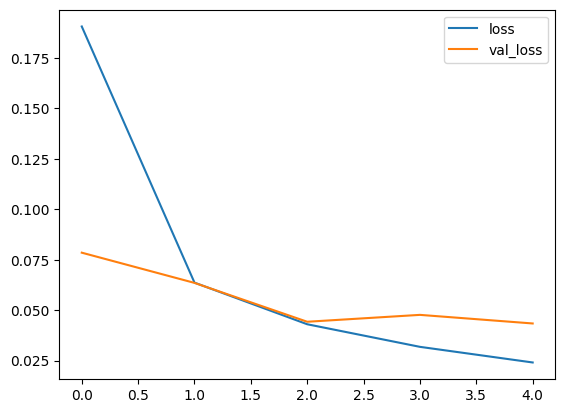

In [46]:
metrics[['loss','val_loss']].plot()
print("Developed by :SHRIRAM S ")
print("Reg No:212222240098")

In [47]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)


313/313 [==============================] - 1s 3ms/step


In [48]:
print(confusion_matrix(y_test,x_test_predictions))
print("Developed by :SHRIRAM S ")
print("Reg No:212222240098")

[[ 970    0    2    0    1    1    2    1    1    2]
 [   0 1133    2    0    0    0    0    0    0    0]
 [   0    4 1017    0    1    0    0    8    2    0]
 [   0    0    1  992    0    8    0    4    3    2]
 [   0    0    0    0  974    0    0    1    0    7]
 [   1    0    0    4    0  885    2    0    0    0]
 [   7    3    0    0    9    3  933    0    3    0]
 [   0    1    8    1    0    0    0 1015    1    2]
 [   4    1    4    0    1    1    1    5  950    7]
 [   0    5    0    0    7    2    0    5    1  989]]
Developed by :SHRIRAM S 
Reg No:212222240098


In [49]:
print(classification_report(y_test,x_test_predictions))
print("Developed by :SHRIRAM S ")
print("Reg No:212222240098")

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.99      0.98      0.99      1010
           4       0.98      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.97      0.98       958
           7       0.98      0.99      0.98      1028
           8       0.99      0.98      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

Developed by :SHRIRAM S 
Reg No:212222240098


In [50]:
img = image.load_img('/content/mnist1.png')

In [51]:
type(img)

PIL.Image.Image

In [52]:
img = image.load_img('/content/mnist1.png')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0

In [53]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 14ms/step


In [54]:
print(x_single_prediction)

[3]


Developed by :SHRIRAM S 
Reg No:212222240098


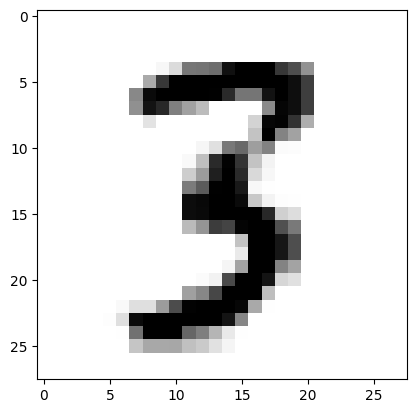

In [55]:
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')
print("Developed by :SHRIRAM S ")
print("Reg No:212222240098")